In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

/home/copper_turtle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/copper_turtle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


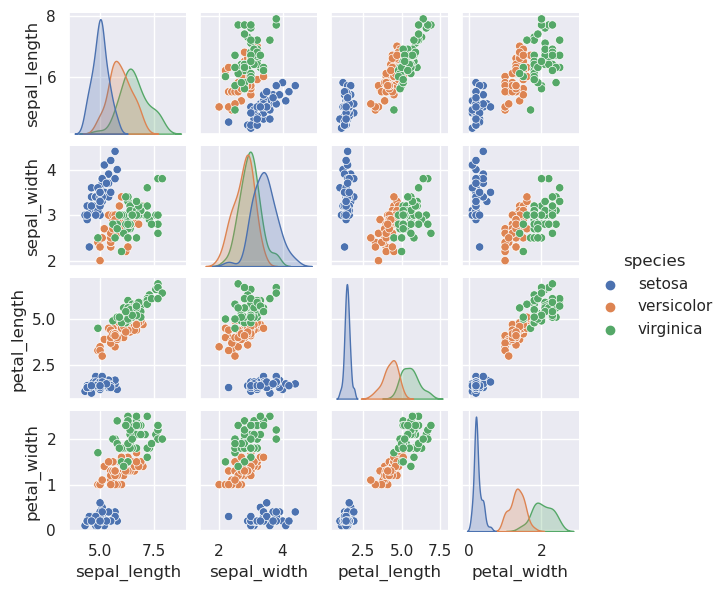

In [5]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [11]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [12]:
y_iris = iris['species']
y_iris.shape

(150,)

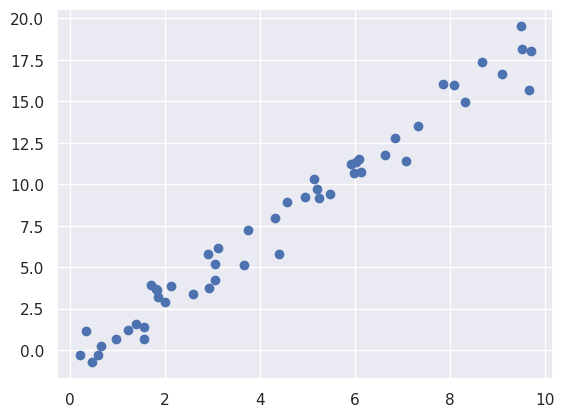

In [13]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

In [14]:
# Choose a class of model
# http://scikit-learn.org/stable/modules/linear_model.html
# https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html
# http://statsmodels.sourceforge.net/
from sklearn.linear_model import LinearRegression

In [18]:
# Choose model hyperparameters
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [19]:
# Arrange data into a features matrix and target vector
X = x[:, np.newaxis]
X.shape

(50, 1)

In [22]:
# Fit the model to your data
model.fit(X,y)
# by scikey-learn convention all model parameters that are learned duirng fit() have trailing underscores
print(f"model.coef_: {model.coef_}")
print(f"model.intercept_: {model.intercept_}")


model.coef_: [1.9776566]
model.intercept_: -0.9033107255311164


In [23]:
# Predict labels for unknown data
xfit = np.linspace(-1, 11)

In [24]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

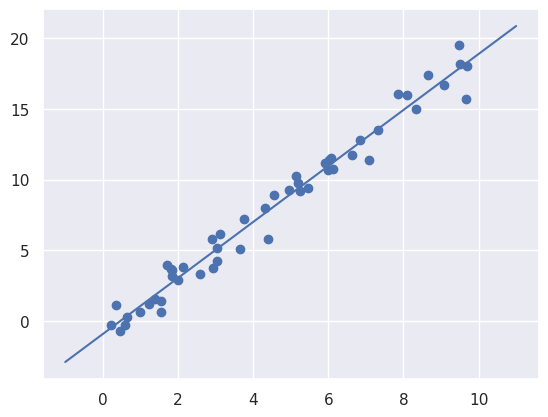

In [27]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [29]:
# Supervised learning example: Iris Classification
# Gaussian naive Bayes
# https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [30]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest) 

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

In [32]:
# Unsupervised learning example: Iris dimesnsionality
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

In [35]:
X_2D.shape

(150, 2)

/home/copper_turtle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


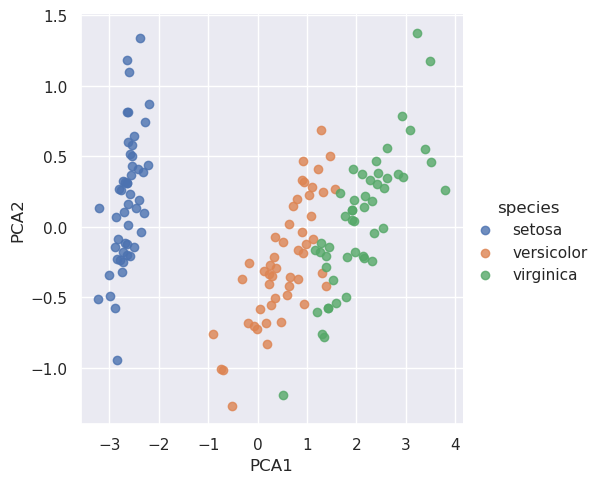

In [40]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y = "PCA2", hue='species', data=iris, fit_reg=False);

In [42]:
# Unsupervised learning: Iris clustering
from sklearn import mixture  # 1. Choose the model class
model = mixture.GaussianMixture(n_components=3, covariance_type='full') #2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

In [43]:
y_gmm.shape

(150,)

/home/copper_turtle/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


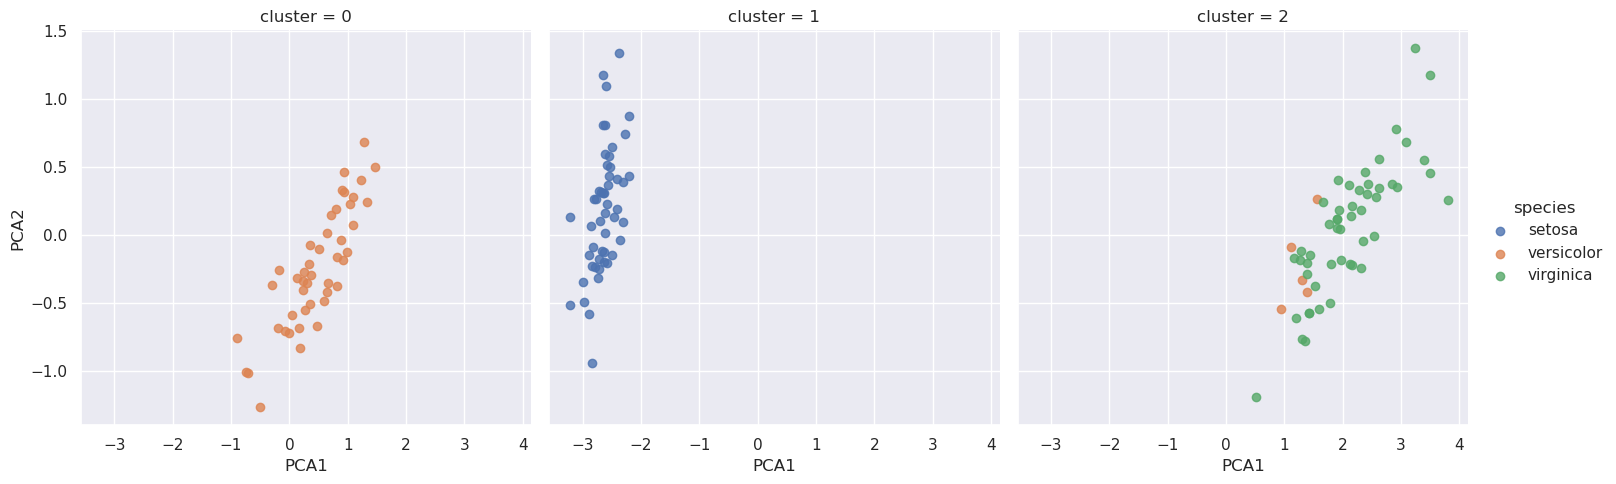

In [44]:
iris['cluster'] = y_gmm
sns.lmplot(x = "PCA1", y = "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [48]:
# Application: Exploring hand-written digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

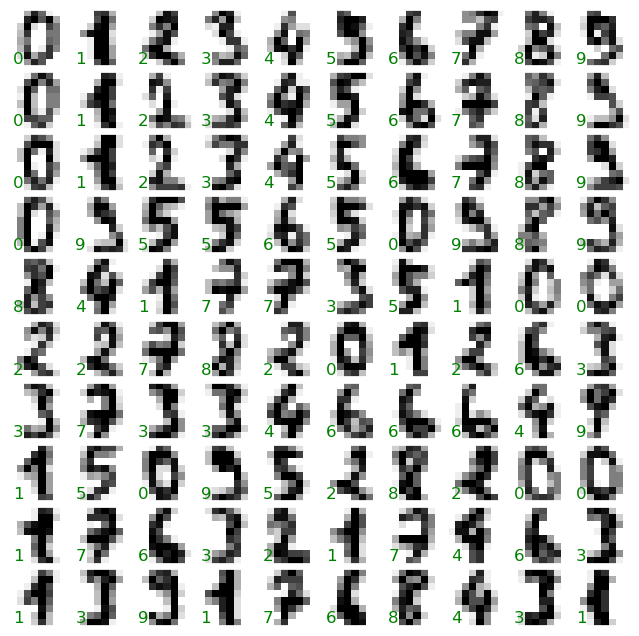

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [49]:
X = digits.data
X.shape

(1797, 64)

In [50]:
y = digits.target
y.shape

(1797,)

In [51]:
type(X)

numpy.ndarray

In [52]:
# Unsupervised learning: Dimensionality reduction
# https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html

from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/home/copper_turtle/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/copper_turtle/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

/tmp/ipykernel_294774/4159090466.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


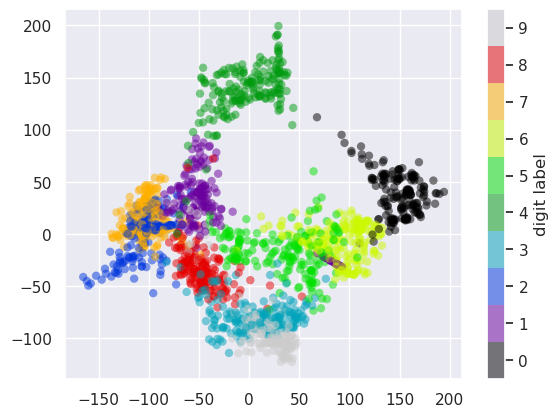

In [68]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [69]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)


In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

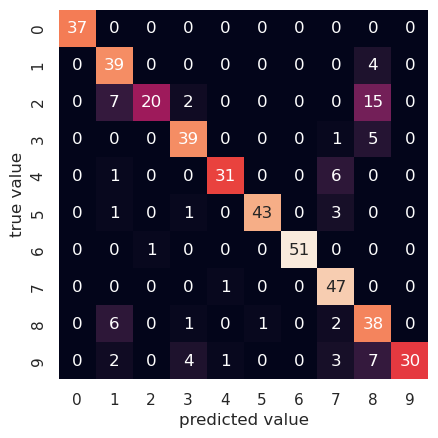

In [73]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

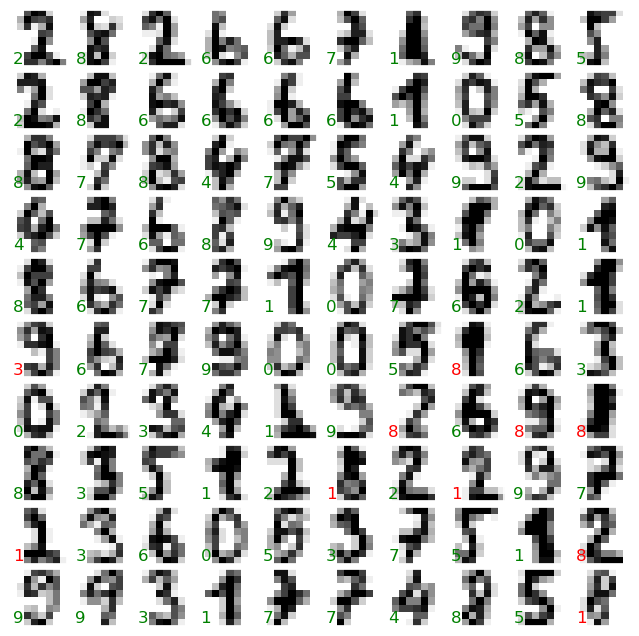

In [74]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')